In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/diamonds_train.csv')

In [3]:
df['Type'].value_counts()

Type
GIA              500
IGI Lab-Grown    500
Name: count, dtype: int64

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               999 non-null    object 
 1   Cut                 280 non-null    object 
 2   Color               999 non-null    object 
 3   Clarity             999 non-null    object 
 4   Carat Weight        999 non-null    float64
 5   Length/Width Ratio  999 non-null    float64
 6   Depth %             998 non-null    float64
 7   Table %             993 non-null    float64
 8   Polish              993 non-null    object 
 9   Symmetry            993 non-null    object 
 10  Girdle              993 non-null    object 
 11  Culet               500 non-null    object 
 12  Length              993 non-null    float64
 13  Width               993 non-null    float64
 14  Height              993 non-null    float64
 15  Price               1000 non-null   int64  
 16  Type   

In [5]:
#Quase todos registros do tipo GIA tem Culet
df['Type'][df['Culet'].isnull()].value_counts()

Type
GIA              497
IGI Lab-Grown      3
Name: count, dtype: int64

In [6]:
#Decidi remover as colunas Cut, Culet e Fluorescence. Devido a quantidade excessiva de falta de informações
df = df.drop(columns=['Cut', 'Culet', 'Fluorescence'], axis=1)

In [7]:
df.isnull().sum()

Shape                 1
Color                 1
Clarity               1
Carat Weight          1
Length/Width Ratio    1
Depth %               2
Table %               7
Polish                7
Symmetry              7
Girdle                7
Length                7
Width                 7
Height                7
Price                 0
Type                  0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
192,Radiant,G,VVS1,1.01,1.32,69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4080,GIA
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1210,IGI Lab-Grown
273,Marquise,D,VS2,2.01,1.85,64.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22350,GIA
346,Oval,H,VS2,1.01,1.59,61.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3770,GIA
519,Heart,G,VVS2,1.51,1.20,58.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6390,GIA
622,Round,E,VS1,1.58,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1840,IGI Lab-Grown
960,Heart,E,VS1,2.89,1.14,55.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4780,IGI Lab-Grown


In [9]:
indexes = df[df.isnull().any(axis=1)].index
df = df.drop(index=indexes, axis=1)

In [10]:
df['Type'].value_counts()

Type
IGI Lab-Grown    497
GIA              496
Name: count, dtype: int64

-------------------------------

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               993 non-null    object 
 1   Color               993 non-null    object 
 2   Clarity             993 non-null    object 
 3   Carat Weight        993 non-null    float64
 4   Length/Width Ratio  993 non-null    float64
 5   Depth %             993 non-null    float64
 6   Table %             993 non-null    float64
 7   Polish              993 non-null    object 
 8   Symmetry            993 non-null    object 
 9   Girdle              993 non-null    object 
 10  Length              993 non-null    float64
 11  Width               993 non-null    float64
 12  Height              993 non-null    float64
 13  Price               993 non-null    int64  
 14  Type                993 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 124.1+ KB


In [12]:
df = pd.get_dummies(data=df, columns=['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle'], drop_first=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 993 entries, 0 to 999
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carat Weight                              993 non-null    float64
 1   Length/Width Ratio                        993 non-null    float64
 2   Depth %                                   993 non-null    float64
 3   Table %                                   993 non-null    float64
 4   Length                                    993 non-null    float64
 5   Width                                     993 non-null    float64
 6   Height                                    993 non-null    float64
 7   Price                                     993 non-null    int64  
 8   Type                                      993 non-null    object 
 9   Shape_Cushion Modified                    993 non-null    bool   
 10  Shape_Emerald                             9

---------------------------------

In [14]:
teste = pd.DataFrame()

In [15]:
df['Type'].value_counts()

Type
IGI Lab-Grown    497
GIA              496
Name: count, dtype: int64

In [16]:
df['Type'] = df['Type'].apply(lambda x: 1 if x == 'GIA' else 0)

In [17]:
df['Type'].value_counts()

Type
0    497
1    496
Name: count, dtype: int64

In [18]:
df.reset_index(inplace=True, drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carat Weight                              993 non-null    float64
 1   Length/Width Ratio                        993 non-null    float64
 2   Depth %                                   993 non-null    float64
 3   Table %                                   993 non-null    float64
 4   Length                                    993 non-null    float64
 5   Width                                     993 non-null    float64
 6   Height                                    993 non-null    float64
 7   Price                                     993 non-null    int64  
 8   Type                                      993 non-null    int64  
 9   Shape_Cushion Modified                    993 non-null    bool   
 10  Shape_Emerald                         

In [20]:
X = df.drop(columns=['Type'], axis=1)
y = df['Type']

In [21]:
X

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,Shape_Cushion Modified,Shape_Emerald,Shape_Heart,Shape_Marquise,Shape_Oval,Shape_Pear,Shape_Princess,Shape_Radiant,Shape_Round,Shape_Square Radiant,Color_E,Color_F,Color_G,Color_H,Clarity_IF,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_Good,Polish_Very Good,Symmetry_Good,Symmetry_Very Good,Girdle_Extremely Thin to Medium,Girdle_Medium,Girdle_Medium to Extremely Thick,Girdle_Medium to Slightly Thick,Girdle_Medium to Thick,Girdle_Medium to Very Thick,Girdle_Slightly Thick,Girdle_Slightly Thick to Extremely Thick,Girdle_Slightly Thick to Slightly Thick,Girdle_Slightly Thick to Thick,Girdle_Slightly Thick to Very Thick,Girdle_Thick,Girdle_Thick to Extremely Thick,Girdle_Thick to Very Thick,Girdle_Thin,Girdle_Thin to Extremely Thick,Girdle_Thin to Medium,Girdle_Thin to Slightly Thick,Girdle_Thin to Thick,Girdle_Thin to Very Thick,Girdle_Very Thick,Girdle_Very Thick to Extremely Thick,Girdle_Very Thin to Thick,Girdle_Very Thin to Very Thick
0,1.00,1.18,61.7,58.0,5.85,6.89,4.25,7110,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1.01,1.35,69.4,66.0,6.80,5.05,3.50,3050,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,1.00,1.45,59.8,57.0,8.19,5.63,3.36,4660,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1.10,2.02,61.4,61.0,11.01,5.46,3.35,1100,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1.01,1.40,63.0,63.0,7.89,5.64,3.55,4480,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2.33,1.15,53.3,63.0,8.27,9.47,5.05,4110,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
989,1.00,1.03,74.3,71.0,5.46,5.29,3.93,1160,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
990,1.58,1.01,60.9,58.0,7.50,7.55,4.58,1850,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
991,1.08,1.60,63.6,56.0,9.07,5.66,3.60,1090,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,

-------------------------------------

In [86]:
df_validate['Type'].value_counts()
# print(2850/1373)

Type
1    2850
0    1373
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, y_train)

c:\Users\Vinicius\Documents\dev\algoritmos-academy\regressao logistica\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
proba_test = model.predict_proba(X_test)

In [26]:
model.score(X_test, y_test)

0.9849246231155779

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9849246231155779

In [29]:
precision_score(y_true=y_test, y_pred=y_pred)

0.9772727272727273

In [30]:
recall_score(y_true=y_test, y_pred=y_pred)

0.9885057471264368

In [31]:
f1_score(y_true=y_test, y_pred=y_pred)

0.9828571428571429

----------------------------------------

In [32]:
df_validate = pd.read_csv('data/diamonds_validate.csv')
df_validate = df_validate.drop(columns=['Cut', 'Culet', 'Fluorescence'], axis=1)

In [33]:
indexes = df_validate[df_validate.isnull().any(axis=1)].index
df_validate = df_validate.drop(index=indexes, axis=1)

In [34]:
df_validate['Type'] = df_validate['Type'].apply(lambda x: 1 if x == 'GIA' else 0)

In [35]:
df_validate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4223 entries, 0 to 4230
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               4223 non-null   object 
 1   Color               4223 non-null   object 
 2   Clarity             4223 non-null   object 
 3   Carat Weight        4223 non-null   float64
 4   Length/Width Ratio  4223 non-null   float64
 5   Depth %             4223 non-null   float64
 6   Table %             4223 non-null   float64
 7   Polish              4223 non-null   object 
 8   Symmetry            4223 non-null   object 
 9   Girdle              4223 non-null   object 
 10  Length              4223 non-null   float64
 11  Width               4223 non-null   float64
 12  Height              4223 non-null   float64
 13  Price               4223 non-null   int64  
 14  Type                4223 non-null   int64  
dtypes: float64(7), int64(2), object(6)
memory usage: 527.9+ KB


In [36]:
X_validate = df.drop(columns=['Type'], axis=1)
y_validate = df['Type']

In [37]:
y_pred_validate = model.predict(X_validate)

In [38]:
precision_score(y_true=y_validate, y_pred=y_pred_validate)

0.9919191919191919

In [39]:
recall_score(y_true=y_validate, y_pred=y_pred_validate)

0.9899193548387096

In [40]:
f1_score(y_true=y_validate, y_pred=y_pred_validate)

0.9909182643794148

In [41]:
y_pred_validate_proba = model.predict_proba(X_validate)[:,1]

In [42]:
T = 0.5

y_pred_validate_bin = (y_pred_validate_proba > T).astype(int)

accuracy = accuracy_score(y_true=y_validate, y_pred=y_pred_validate_bin)
precision = precision_score(y_true=y_validate, y_pred=y_pred_validate_bin)
recall = recall_score(y_true=y_validate, y_pred=y_pred_validate_bin)
f1 = f1_score(y_true=y_validate, y_pred=y_pred_validate_bin)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1: {f1:.3f}')

Accuracy: 0.991
Precision: 0.992
Recall: 0.990
F1: 0.991


In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_validate, y_pred_validate_proba)

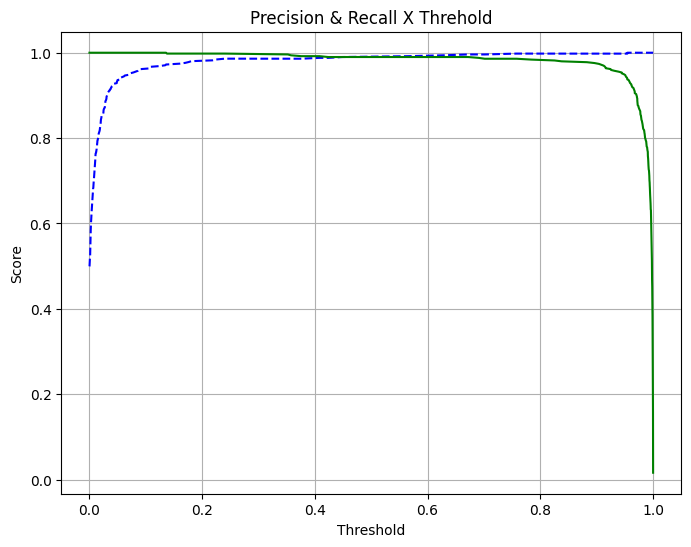

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='recalls')

plt.title('Precision & Recall X Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.grid(True)

plt.show()

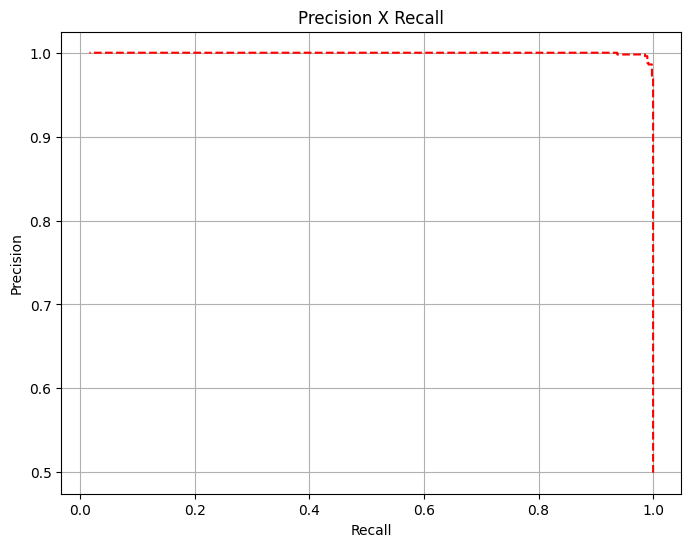

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(recalls[:-1], precisions[:-1], 'r--', label='precision')

plt.title('Precision X Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

plt.show()

In [ ]:
thresholds[recalls[:-1] > 0.91]

In [79]:
fpr, tpr, thresholds_roc = roc_curve(y_validate, y_pred_validate_proba)

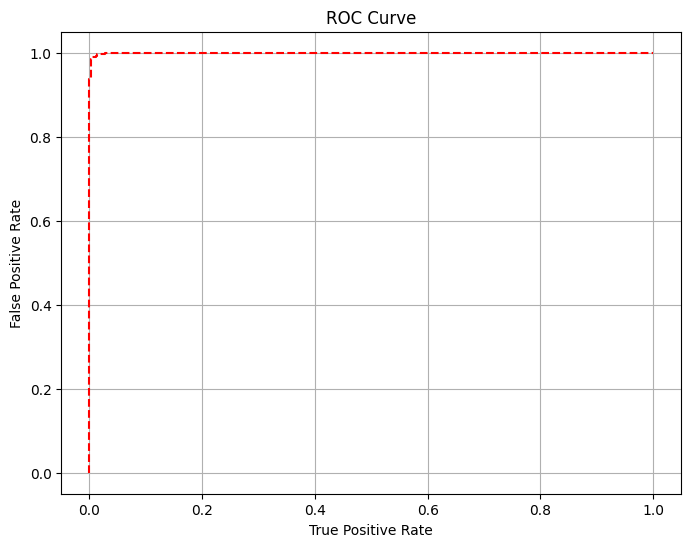

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'r--', label='roc curve')

plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.grid(True)

plt.show()

#Comparar com outros modelos